In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from sklearn.metrics import mean_squared_error

In [2]:
def calculate_angles(side_1, joint, side_2):
    # if len(x_values) != len(y_values) or any(len(x) != len(y) for x, y in zip(x_values, y_values)):
    #     raise ValueError("Input lists must have the same length, and sublists must contain the same number of values.")

    angles = []

    for i in range(len(side_1)):

        ba = side_1[i] - joint[i]
        bc = side_2[i] - joint[i]

        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)

        angles.append(angle*180/np.pi)

    return angles

# Inteprolation
# 1D Methods
def upsample_fourier(frequency, signal, target_frequency):
    signal = np.transpose(signal)
    upsampled_signal = []
    
    for row in signal:
        upsampled_signal.append(scipy.signal.resample(row, int(target_frequency/frequency*len(row))))

    return np.transpose(upsampled_signal)

def spline_linear(frequency, signal, target_frequency, time_vector):
    signal = np.transpose(signal)
    upsampled_signal = []
    
    for row in signal:
        upsampled_signal.append(np.interp(time_vector, time_vector, row))

    return np.transpose(upsampled_signal)

def spline_cubic(frequency, signal, target_frequency, time_vector):
    signal = np.transpose(signal)
    new_time = np.arange(start=0, stop=time_vector[-1], step=1/target_frequency)
    upsampled_signal = []
    
    for row in signal:
        f = scipy.interpolate.CubicSpline(time_vector, row, bc_type='natural')
        upsampled_signal.append(f(new_time))

    return np.transpose(upsampled_signal)

def interpolation_lanczos(frequency, signal, target_frequency, time_vector, a):

    # print(np.round(a*target_frequency/frequency))

    scaling_factor = np.round(target_frequency/frequency)

    lanczos_kernel = np.ones(int(2*scaling_factor*a-1))
    middle = np.floor(len(lanczos_kernel)/2)

    for i in range(len(lanczos_kernel)):
        # print(((i-middle)/scaling_factor))
        cur_val = (i-middle)/scaling_factor
        lanczos_kernel[i] = np.sinc(cur_val) * np.sinc(cur_val / (a))

    # print(lanczos_kernel)

    new_time = np.linspace(start=0, stop=time_vector[-1], num=int(len(signal)*scaling_factor))
    padded_signal = np.zeros((len(signal), len(new_time)))
    for i in range(len(time_vector)):
        for s in range(len(signal[0])):
            padded_signal[s][int(i*scaling_factor)] = signal[i][s]

    upsampled_signal = []
    
    for s in range(len(signal[0])):
        upsampled_signal.append(np.convolve(padded_signal[s], lanczos_kernel, mode='same'))

    # plt.stem(new_time, padded_signal[0])
    # plt.plot(new_time, upsampled_signal[0], color='red')
    # plt.xlim([14, 15])

    return np.transpose(upsampled_signal)

def interpolation_bspline(frequency, signal, target_frequency, time_vector, s, k_value):

    signal = np.transpose(signal)
    new_time = np.arange(start=time_vector[0], stop=time_vector[-1], step=1/target_frequency)
    upsampled_signal = []
    # print(time_vector)

    for s in range(len(signal)):
        # print(signal[s])
        t, c, k = scipy.interpolate.splrep(time_vector, signal[s], s=s, k=k_value)
        spline = scipy.interpolate.BSpline(t, c, k, extrapolate=False)
        upsampled_signal.append(spline(new_time))
        # print(signal[s] == upsampled_signal[-1])

    return np.transpose(upsampled_signal)

In [3]:
with open('../marker_information_2D_25mph', 'rb') as f:
    marker_info = pickle.load(f)

# print(marker_info)

FileNotFoundError: [Errno 2] No such file or directory: '../marker_information_2D_25mph'

In [ ]:
# begin_index = 100

flank = np.array([x[0] for x in marker_info['green_markers']])
knee = np.array([x[0] for x in marker_info['pink_markers']])
ankle = np.array([x[1] for x in marker_info['green_markers']])
toe = np.array([x[1] for x in marker_info['pink_markers']])

angle_knee_original = calculate_angles(flank, knee, ankle)
angle_ankle_original = calculate_angles(knee, ankle, toe)

upsample_frequency = 120
frequency = 1/(marker_info['timeVector'][-1]/len(marker_info['timeVector']))

# flank = upsample_fourier(frequency, flank, upsample_frequency)
# knee = upsample_fourier(frequency, knee, upsample_frequency)
# ankle = upsample_fourier(frequency, ankle, upsample_frequency)
# toe = upsample_fourier(frequency, toe, upsample_frequency)


t_old = np.linspace(start=0, stop=marker_info['timeVector'][-1], num=len(flank))


# flank = spline_linear(frequency, flank, upsample_frequency, marker_info['timeVector'])
# knee = spline_linear(frequency, knee, upsample_frequency, marker_info['timeVector'])
# ankle = spline_linear(frequency, ankle, upsample_frequency, marker_info['timeVector'])
# toe = spline_linear(frequency, toe, upsample_frequency, marker_info['timeVector'])

# print(flank)

# flank = spline_cubi(frequency, flank, upsample_frequency, marker_info['timeVector'])
# knee = spline_cubic(frequency, knee, upsample_frequency, marker_info['timeVector'])
# ankle = spline_cubic(frequency, ankle, upsample_frequency, marker_info['timeVector'])
# toe = spline_cubic(freqcuency, toe, upsample_frequency, marker_info['timeVector'])

# flank = interpolation_lanczos(frequency, flank, upsample_frequency, marker_info['timeVector'], 3)
# knee = interpolation_lanczos(frequency, knee, upsample_frequency, marker_info['timeVector'], 3)
# ankle = interpolation_lanczos(frequency, ankle, upsample_frequency, marker_info['timeVector'], 3)
# toe = interpolation_lanczos(frequency, toe, upsample_frequency, marker_info['timeVector'], 3)

# flank = interpolation_bspline(frequency, flank, upsample_frequency, marker_info['timeVector'], 0, 4)
# knee = interpolation_bspline(frequency, knee, upsample_frequency, marker_info['timeVector'], 0, 4)
# ankle = interpolation_bspline(frequency, ankle, upsample_frequency, marker_info['timeVector'], 0, 4)
# toe = interpolation_bspline(frequency, toe, upsample_frequency, marker_info['timeVector'], 0, 4)

t_new = np.linspace(start=0, stop=marker_info['timeVector'][-1], num=len(flank))
# print(flank[1])



625


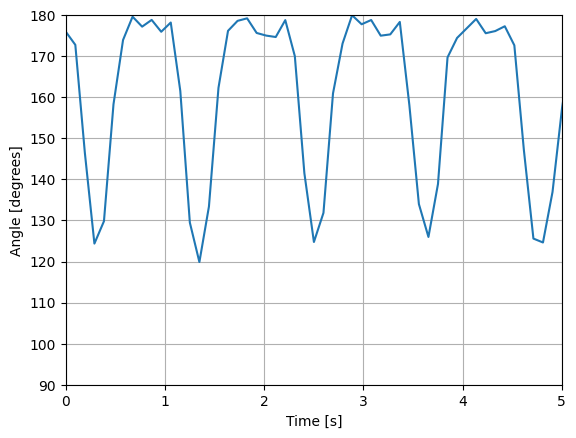

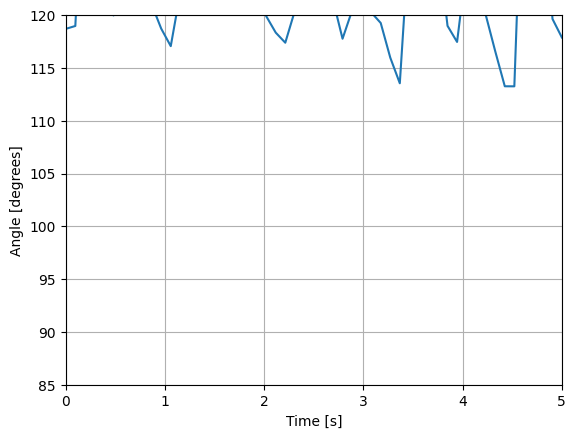

In [ ]:
angle_knee = calculate_angles(flank, knee, ankle)
angle_ankle = calculate_angles(knee, ankle, toe)
print(len(flank))
plt.figure()
# plt.plot(flank[0], flank[1])
plt.plot(t_new, angle_knee)
# plt.scatter(t_old, angle_knee_original)
plt.ylabel('Angle [degrees]')
plt.xlabel('Time [s]')
plt.ylim([90, 180])
plt.xlim([0, 5])
plt.grid()

plt.figure()
plt.plot(t_new, angle_ankle)
plt.ylabel('Angle [degrees]')
plt.xlabel('Time [s]')
plt.ylim([85, 120])
plt.xlim([0, 5])
plt.grid()

(-4.039235926057292, 1.6919488450534756)

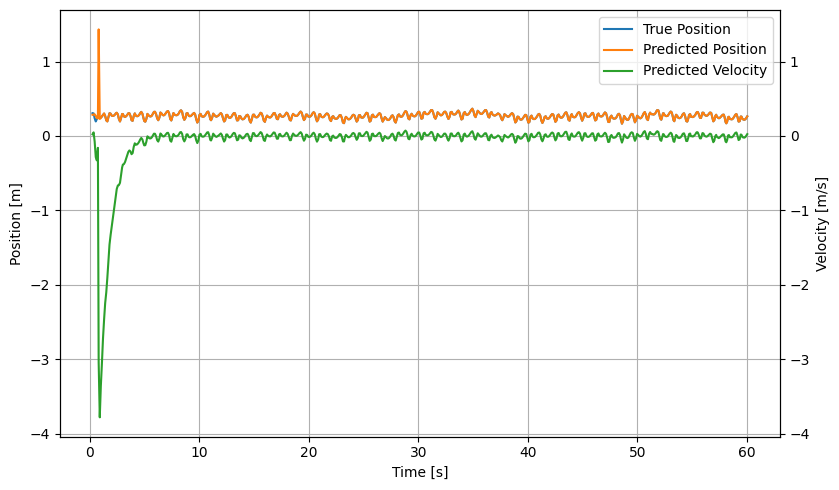

In [ ]:
signal_y = [f[1] for f in flank]

timeStep = 1

def predict(A, x_prev, P_prev, Q):
    x_cur = A @ x_prev
    P_next = (A @ P_prev) @ A.T + Q
    return x_cur, P_next

def update(z_cur, H, x_cur, P_next, R):
    y_innovation = z_cur - H @ x_cur
    # print(y_innovation)
    innovation = H @ P_next @ H.T + R
    # print(np.linalg.inv(innovation))
    # print(P_next @ H.T)
    kalman_gain = P_next @ H.T * np.linalg.inv(innovation)[0][0]
    # print(kalman_gain)
    x_post = x_cur + kalman_gain * y_innovation
    P_post = ((np.identity(len(P_next)) - kalman_gain @ H) @ P_next)
    y_post = z_cur - H @ x_post
    # print(x_post)
    return x_post, P_post, y_post


# Velocity test
timestep = 0.1
sigma_a = 0.001
sigma_z= 10

A = np.array([[1, timestep], [0, 1]])
H = np.array([1, 0])
P_prev = np.array([[1, 0], [0, 1000]])
Q = np.array([[0.25*timestep**4, 0.5*timestep**2], [0.5*timestep**2, 1]]) * sigma_a**2
R = np.identity(1) * sigma_z**2

filtered_outputs = []
x_prev = [signal_y[0], 0]

for i in range(len(signal_y)-1):
    x_cur, P_next = predict(A, x_prev, P_prev, Q)
    x_prev, P_prev, y_post = update(signal_y[i+1], H, x_cur, P_next, R)

    filtered_outputs.append(x_prev)

fig, ax = plt.subplots(figsize = (8, 5))
# ax2 = ax.twinx()
# ax2.set_yticks([])
ax.plot(marker_info['timeVector'][1:], np.array(signal_y[1:])/600)
ax.plot(marker_info['timeVector'][1:], np.array(filtered_outputs)/600)

plt.xlabel('Time [s]')
ax.set_ylabel('Position [m]')
plt.legend(labels=['True Position', 'Predicted Position', 'Predicted Velocity'])
plt.tight_layout()
plt.grid()
# ax.tick_params(labeltop=False, labelright=True)
# ax2.set_ylabel('Velocity [m/s]')
# plt.xlim([0, 10])

ax1 = ax.twinx() # adds black frame

ax1.set_yticks(ax.get_yticks())
ax1.set_yticklabels(ax.get_yticklabels())
ax1.set_ylabel('Velocity [m/s]')
ax1.set_ylim(ax.get_ylim())

(-0.12997700094725934, 0.39031636512447265)

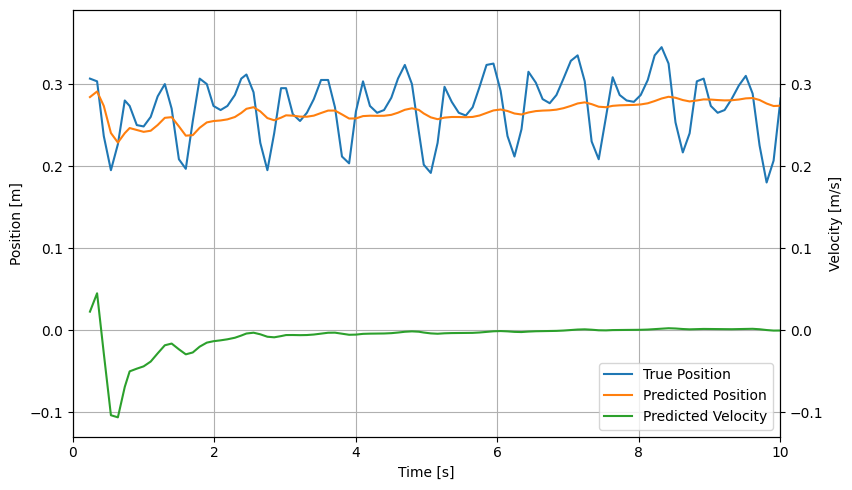

In [ ]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

timestep = 1/10
f = KalmanFilter(dim_x=2, dim_z=1)
f.x = np.array([signal_y[0], 0])
f.F = np.array([[1.,timestep],
                [0.,1.]])

f.H = np.array([[1.,0.]])

f.P = np.array([[1.,    0.],
                [   0., 1000.] ])

f.R = np.array([[100]])

f.Q = np.array([[0.25*timestep**4, 0.5*timestep**2],
                [0.5*timestep**2, 1]]) * 0.01


filtered_outputs = []

for index, cur_measure in enumerate(signal_y[1:]):
    f.predict()
    f.update(cur_measure)
    filtered_outputs.append(f.x)

fig, ax = plt.subplots(figsize = (8, 5))
# ax2 = ax.twinx()
# ax2.set_yticks([])
ax.plot(marker_info['timeVector'][1:], np.array(signal_y[1:])/600)
ax.plot(marker_info['timeVector'][1:], np.array(filtered_outputs)/600)

plt.xlabel('Time [s]')
ax.set_ylabel('Position [m]')
plt.legend(labels=['True Position', 'Predicted Position', 'Predicted Velocity'])
plt.tight_layout()
plt.grid()
# ax.tick_params(labeltop=False, labelright=True)
# ax2.set_ylabel('Velocity [m/s]')
plt.xlim([0, 10])

ax1 = ax.twinx() # adds black frame

ax1.set_yticks(ax.get_yticks())
ax1.set_yticklabels(ax.get_yticklabels())
ax1.set_ylabel('Velocity [m/s]')
ax1.set_ylim(ax.get_ylim())

249
We ignore the first 5 seconds as the kalman prediction aligns with the actual position. Fast (1 Hz), Medium (0.5 Hz), Slow (0.25 Hz)
RMSE_slow: 23.363913820702674
RMSE_medium: 33.11000981648712
RMSE_fast: 47.00247228854736
Per gait:
Slow gait. Mean: 23.269823193458222, SEM: 0.9772974242005459
Medium gait. Mean: 32.961333476364096, SEM: 0.9650677837230209
Fast gait. Mean: 46.819748412774686, SEM: 0.8972904202561941
Slow/Medium T-Test: 2.795371836845742e-05
Medium/Fast T-Test: 2.4025709771948597e-10
Slow/Fast T-Test: 9.303081231657025e-12


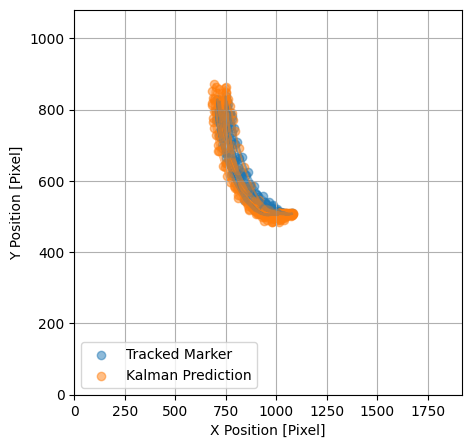

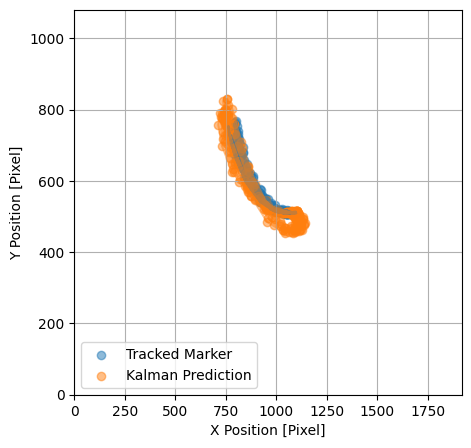

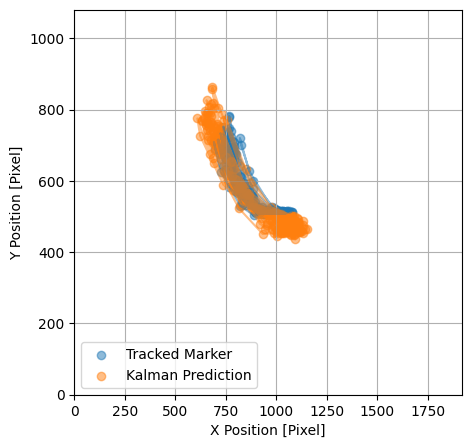

In [ ]:
with open('../Old_Data/messy_info_2D_fast_T2', 'rb') as f:
    messy_info_2D_fast = pickle.load(f)

with open('../Old_Data/messy_info_2D_slow_T2', 'rb') as f:
    messy_info_2D_slow = pickle.load(f)

with open('../Old_Data/messy_info_2D_medium_T2', 'rb') as f:
    messy_info_2D_medium = pickle.load(f)

cropped_track_slow = messy_info_2D_slow['green_markers'][50:]
cropped_predict_slow = messy_info_2D_slow['kalman_tracking'][50:]
cropped_track_medium = messy_info_2D_medium['green_markers'][50:]
cropped_predict_medium = messy_info_2D_medium['kalman_tracking'][50:]
cropped_track_fast = messy_info_2D_fast['green_markers'][50:]
cropped_predict_fast = messy_info_2D_fast['kalman_tracking'][50:]

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(np.array([m[0] for m in cropped_track_slow]), 1080-np.array([m[1] for m in cropped_track_slow]), alpha=0.5)
ax.scatter(np.array([m[0] for m in cropped_predict_slow]), 1080-np.array([m[1] for m in cropped_predict_slow]), alpha=0.5)
ax.plot(np.array([m[0] for m in cropped_track_slow]), 1080-np.array([m[1] for m in cropped_track_slow]), alpha=0.5)
ax.plot(np.array([m[0] for m in cropped_predict_slow]), 1080-np.array([m[1] for m in cropped_predict_slow]), alpha=0.5)
plt.grid()
plt.legend(labels=['Tracked Marker', 'Kalman Prediction'], loc='lower left')
plt.xlabel('X Position [Pixel]')
plt.ylabel('Y Position [Pixel]')
plt.xlim([0, 1920])
plt.ylim([0, 1080])

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(np.array([m[0] for m in cropped_track_medium]), 1080-np.array([m[1] for m in cropped_track_medium]), alpha=0.5)
ax.scatter(np.array([m[0] for m in cropped_predict_medium]), 1080-np.array([m[1] for m in cropped_predict_medium]), alpha=0.5)
ax.plot(np.array([m[0] for m in cropped_track_medium]), 1080-np.array([m[1] for m in cropped_track_medium]), alpha=0.5)
ax.plot(np.array([m[0] for m in cropped_predict_medium]), 1080-np.array([m[1] for m in cropped_predict_medium]), alpha=0.5)
plt.grid()
plt.legend(labels=['Tracked Marker', 'Kalman Prediction'], loc='lower left')
plt.xlabel('X Position [Pixel]')
plt.ylabel('Y Position [Pixel]')
plt.xlim([0, 1920])
plt.ylim([0, 1080])

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(np.array([m[0] for m in cropped_track_fast]), 1080-np.array([m[1] for m in cropped_track_fast]), alpha=0.5)
ax.scatter(np.array([m[0] for m in cropped_predict_fast]), 1080-np.array([m[1] for m in cropped_predict_fast]), alpha=0.5)
ax.plot(np.array([m[0] for m in cropped_track_fast]), 1080-np.array([m[1] for m in cropped_track_fast]), alpha=0.5)
ax.plot(np.array([m[0] for m in cropped_predict_fast]), 1080-np.array([m[1] for m in cropped_predict_fast]), alpha=0.5)
plt.grid()
plt.legend(labels=['Tracked Marker', 'Kalman Prediction'], loc='lower left')
plt.xlabel('X Position [Pixel]')
plt.ylabel('Y Position [Pixel]')
plt.xlim([0, 1920])
plt.ylim([0, 1080])

rmse_slow = mean_squared_error(cropped_track_slow[1:], cropped_predict_slow[0:len(cropped_predict_slow)], squared = False)
rmse_medium = mean_squared_error(cropped_track_medium[1:], cropped_predict_medium[0:len(cropped_predict_slow)], squared = False)
rmse_fast = mean_squared_error(cropped_track_fast[1:], cropped_predict_fast[0:len(cropped_predict_slow)], squared = False)

print(len(cropped_track_slow[2:]))
print("We ignore the first 5 seconds as the kalman prediction aligns with the actual position. Fast (1 Hz), Medium (0.5 Hz), Slow (0.25 Hz)")
print(f"RMSE_slow: {rmse_slow}")
print(f"RMSE_medium: {rmse_medium}")
print(f"RMSE_fast: {rmse_fast}")

rmse_trials_slow = []
rmse_trials_medium = []
rmse_trials_fast = []

slow_tracked = np.array_split(cropped_track_slow[1:], 5)
slow_predict = np.array_split(cropped_predict_slow, 5)
medium_tracked = np.array_split(cropped_track_medium[1:], 10)
medium_predict = np.array_split(cropped_predict_medium, 10)
fast_tracked = np.array_split(cropped_track_fast[1:], 20)
fast_predict = np.array_split(cropped_predict_fast, 20)

for t, p in zip(slow_tracked, slow_predict):
    rmse_trials_slow.append(mean_squared_error(t, p, squared = False))
rmse_trials_slow = np.array(rmse_trials_slow)

for t, p in zip(medium_tracked, medium_predict):
    rmse_trials_medium.append(mean_squared_error(t, p, squared = False))
rmse_trials_medium = np.array(rmse_trials_medium)

for t, p in zip(fast_tracked, fast_predict):
    rmse_trials_fast.append(mean_squared_error(t, p, squared = False))
rmse_trials_fast = np.array(rmse_trials_fast)

slow_rmse_mean = np.mean(rmse_trials_slow)
slow_rmse_sem = scipy.stats.sem(rmse_trials_slow)

medium_rmse_mean = np.mean(rmse_trials_medium)
medium_rmse_sem = scipy.stats.sem(rmse_trials_medium)

fast_rmse_mean = np.mean(rmse_trials_fast)
fast_rmse_sem = scipy.stats.sem(rmse_trials_fast)

print('Per gait:')
print(f"Slow gait. Mean: {slow_rmse_mean}, SEM: {slow_rmse_sem}")
print(f"Medium gait. Mean: {medium_rmse_mean}, SEM: {medium_rmse_sem}")
print(f"Fast gait. Mean: {fast_rmse_mean}, SEM: {fast_rmse_sem}")

stat, pvalue_sm = scipy.stats.ttest_ind(rmse_trials_slow, rmse_trials_medium)
stat, pvalue_mf = scipy.stats.ttest_ind(rmse_trials_medium, rmse_trials_fast)
stat, pvalue_sf = scipy.stats.ttest_ind(rmse_trials_slow, rmse_trials_fast)

print(f"Slow/Medium T-Test: {pvalue_sm}")
print(f"Medium/Fast T-Test: {pvalue_mf}")
print(f"Slow/Fast T-Test: {pvalue_sf}")

([<matplotlib.axis.XTick at 0x16de81f40>,
 [Text(0, 0, 'Slow (0.25 Hz)'),
  Text(1, 0, 'Medium (0.5 Hz)'),
  Text(2, 0, 'Fast (1 Hz)')])

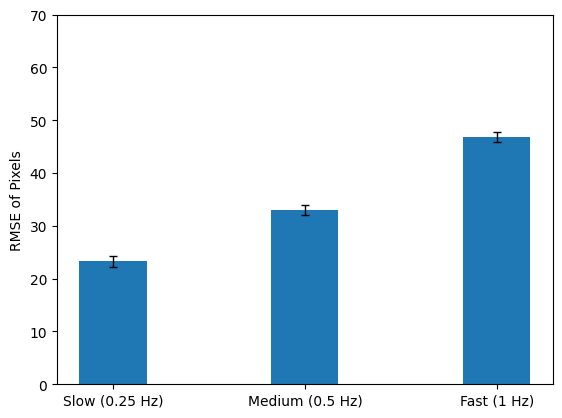

In [ ]:
fig, ax = plt.subplots(1, 1)
p1 = plt.bar(np.arange(3), [slow_rmse_mean, medium_rmse_mean, fast_rmse_mean], width = 0.35)
ax.errorbar(np.arange(3), [slow_rmse_mean, medium_rmse_mean, fast_rmse_mean], yerr=[slow_rmse_sem, medium_rmse_sem, fast_rmse_sem], capsize=3, ecolor='black', fmt=' ', elinewidth=1,)
plt.ylabel('RMSE of Pixels')
plt.ylim([0, 70])
plt.xticks(np.arange(3), ["Slow (0.25 Hz)", "Medium (0.5 Hz)", "Fast (1 Hz)"])

In [10]:
def analyze_trial(marker_information, cadence):

    # Unpack dictionary
    flank = np.array([x[0] for x in marker_information['green_markers']])
    knee = np.array([x[0] for x in marker_information['pink_markers']])
    ankle = np.array([x[-1] for x in marker_information['green_markers']])
    toe = np.array([x[-1] for x in marker_information['pink_markers']])

    # Use interpolation
    frequency = 15
    upsample_frequency = 120
    flank = spline_cubic(frequency, flank, upsample_frequency, marker_information['timeVector'])
    knee = spline_cubic(frequency, knee, upsample_frequency, marker_information['timeVector'])
    ankle = spline_cubic(frequency, ankle, upsample_frequency, marker_information['timeVector'])
    toe = spline_cubic(frequency, toe, upsample_frequency, marker_information['timeVector'])
    t_new = np.linspace(start=marker_information['timeVector'][0], stop=marker_information['timeVector'][-1], num=len(flank))

    # Calculate angles
    angle_knee = 180-np.array(calculate_angles(flank, knee, ankle))
    angle_ankle = calculate_angles(knee, ankle, toe)
    angle_ankle = np.mean(angle_ankle)-np.array(angle_ankle)

    knee_peaks, _ = scipy.signal.find_peaks(angle_knee, distance=upsample_frequency/cadence*2, height=30)
    ankle_peaks, _ = scipy.signal.find_peaks(-1*np.array(angle_ankle), distance=upsample_frequency/cadence*2, height=30)

    # Plot entire trial
    plt.figure(figsize=[12, 10])
    plt.subplot(2, 1, 1)
    plt.plot(t_new, angle_knee, label='Knee Flexion')
    plt.scatter(t_new[knee_peaks], angle_knee[knee_peaks], label='Knee Flexion Peaks', color='red')
    plt.ylabel('Knee Angle [degrees]')
    plt.xlabel('Time [s]')
    plt.ylim([0, 80])
    plt.xlim([10,20])
    plt.grid()
    for index, peak in enumerate(knee_peaks):
        startIndex = int(peak - upsample_frequency/cadence*3 *1/2) + 10
        if startIndex < 0:
            startIndex = 0
        endIndex = int(peak + upsample_frequency/cadence*1*2/3) - 20
        if endIndex >= len(angle_knee):
            endIndex = len(angle_knee)-1
        # print(f"Start: {startIndex}, End: {endIndex}, Index: {index}")
        if index == 1:
            plt.axvspan(t_new[startIndex], t_new[endIndex], facecolor='green', alpha=.2, label='Gait Cycle')
        else:
            plt.axvspan(t_new[startIndex], t_new[endIndex], facecolor='green', alpha=.2)
    # plt.plot(t_new[knee_peaks], angle_knee[knee_peaks], "x")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t_new, angle_ankle, label='Ankle Dorsiflexion')
    plt.ylabel('Ankle Angle [degrees]')
    plt.xlabel('Time [s]')
    plt.ylim([-50, 20])
    plt.xlim([10,20])
    for index, peak in enumerate(knee_peaks):
        startIndex = int(peak - upsample_frequency/cadence*3 *1/2) + 15
        if startIndex < 0:
            startIndex = 0
        endIndex = int(peak + upsample_frequency/cadence*1*2/3) - 20
        if endIndex >= len(angle_knee):
            endIndex = len(angle_knee)-1
        # print(f"Start: {startIndex}, End: {endIndex}, Index: {index}")
        if index == 1:
            plt.axvspan(t_new[startIndex], t_new[endIndex], facecolor='green', alpha=.2, label='Gait Cycle')
        else:
            plt.axvspan(t_new[startIndex], t_new[endIndex], facecolor='darkgreen', alpha=.2)
    # plt.plot(t_new[knee_peaks], angle_knee[knee_peaks], "x")
    plt.grid()
    plt.legend()

    # Crop gait cycle
    cropped_knee = []
    cropped_ankle = []
    

    for kp in knee_peaks:
        startIndex = int(kp - upsample_frequency/cadence*3)
        endIndex = int(kp + upsample_frequency/cadence*1) # non-inclusive
        if (startIndex > 0 and endIndex <= len(angle_knee)):
            cropped_knee.append(angle_knee[startIndex:endIndex])
            cropped_ankle.append(angle_ankle[startIndex:endIndex])
    
    # for kp in ankle_peaks:
    #     startIndex = int(kp - upsample_frequency/cadence*3)
    #     endIndex = int(kp + upsample_frequency/cadence*1) # non-inclusive
    #     if (startIndex > 0 and endIndex <= len(angle_knee)):
            
    # plt.figure(figsize=[5,5])
    # plt.plot(t_new[0:len(cropped_knee[0])], np.mean(cropped_knee, axis=0))
    # plt.plot(t_new[0:len(cropped_knee[0])], np.mean(cropped_knee, axis=0)+np.std(cropped_knee, axis=0), alpha=0.5, linestyle = ':', color='blue')
    # plt.plot(t_new[0:len(cropped_knee[0])], np.mean(cropped_knee, axis=0)-np.std(cropped_knee, axis=0), alpha=0.5, linestyle = ':', color='blue')
    # plt.grid()
    # plt.legend(labels=['Mean', 'Standard Deviation'], loc='upper left')

    # plt.figure(figsize=[5,5])
    # plt.plot(t_new[0:len(cropped_ankle[0])], np.mean(cropped_ankle, axis=0))
    # plt.grid()

    duration = np.mean(t_new)*len(cropped_ankle)

    return duration, cropped_knee, cropped_ankle

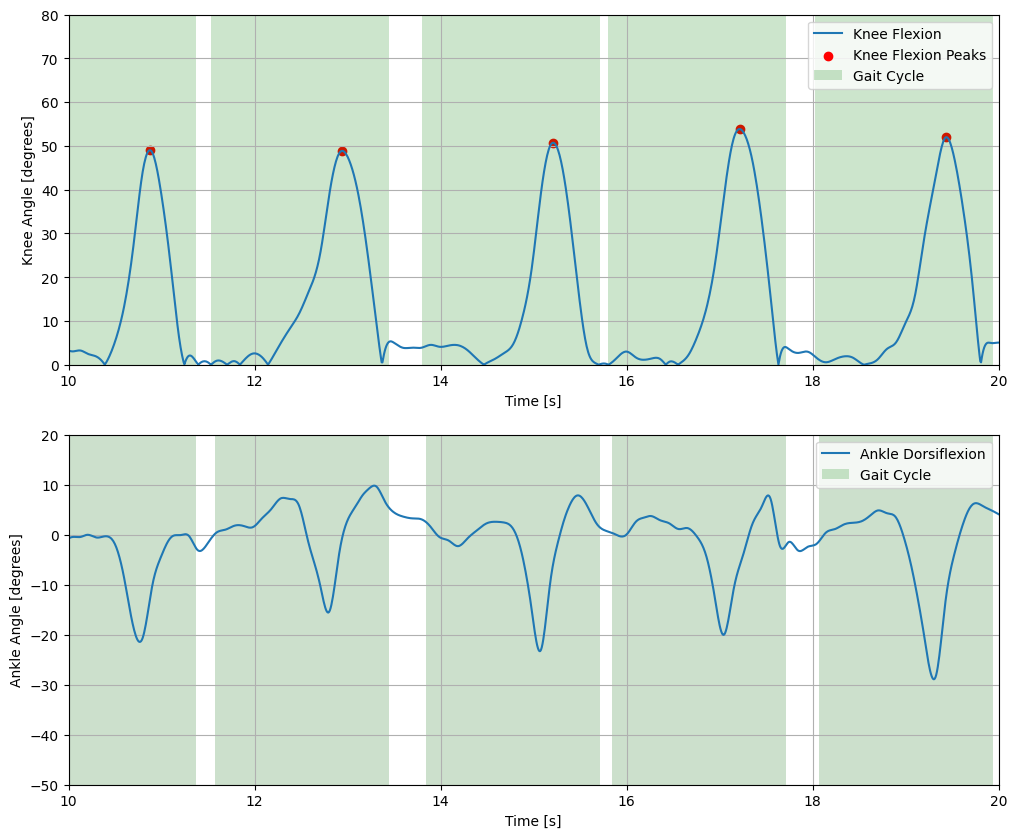

In [11]:
with open('../Old_Data/marker_information_2D_1mph_2', 'rb') as f:
    marker_information = pickle.load(f)

duration_1mph, cropped_knee_1mph, cropped_ankle_1mph = analyze_trial(marker_information, 1)

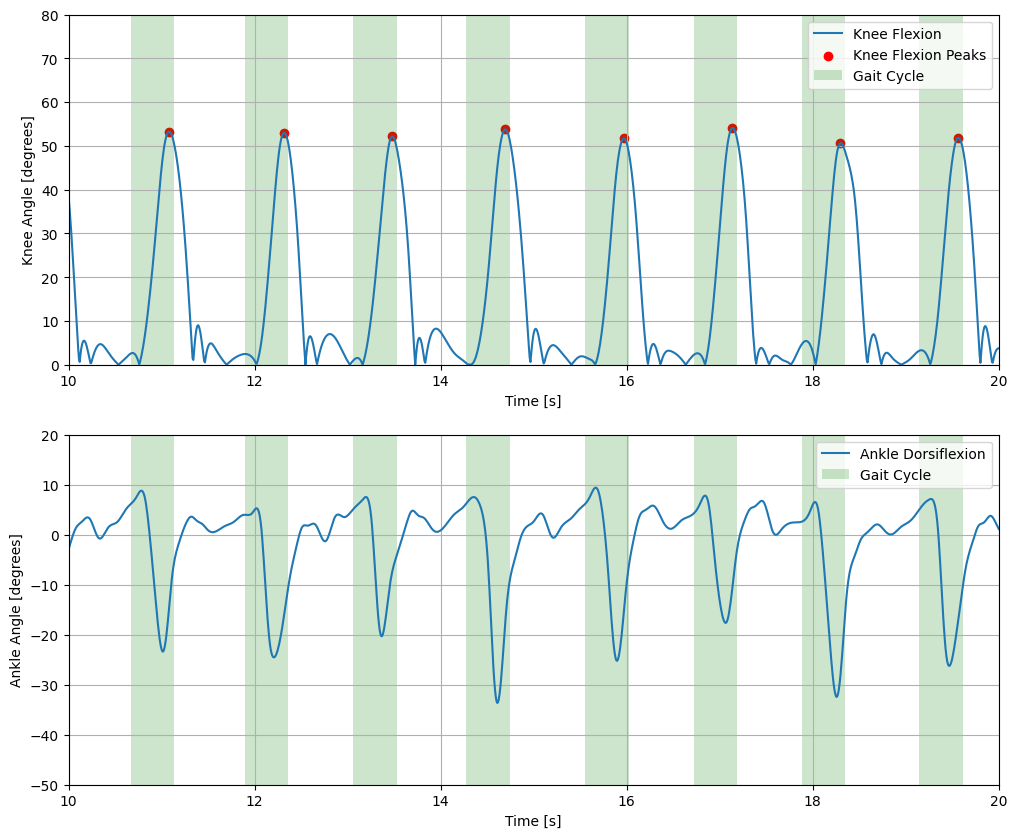

In [14]:
with open('../Old_Data/marker_information_2D_25mph', 'rb') as f:
    marker_information = pickle.load(f)

duration_3mph, cropped_knee_3mph, cropped_ankle_3mph = analyze_trial(marker_information, 3)


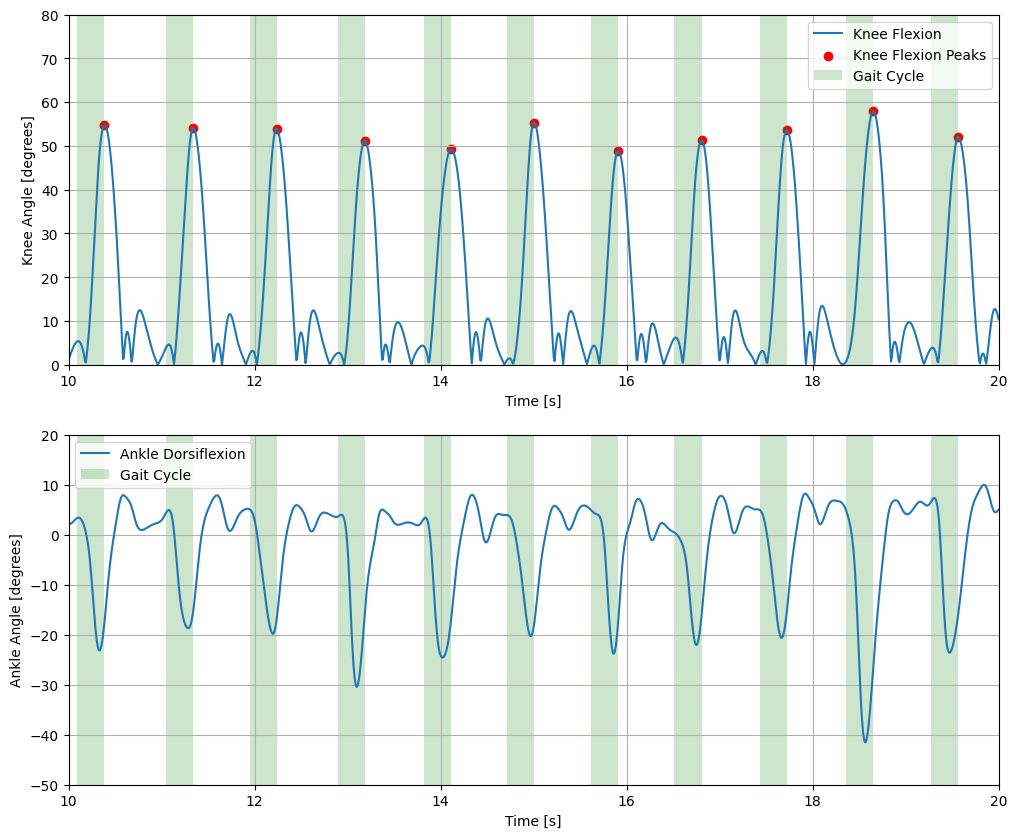

In [15]:
with open('../Old_Data/marker_information_2D_4mph_2', 'rb') as f:
    marker_information = pickle.load(f)

duration_4mph, cropped_knee_4mph, cropped_ankle_4mph = analyze_trial(marker_information, 4)


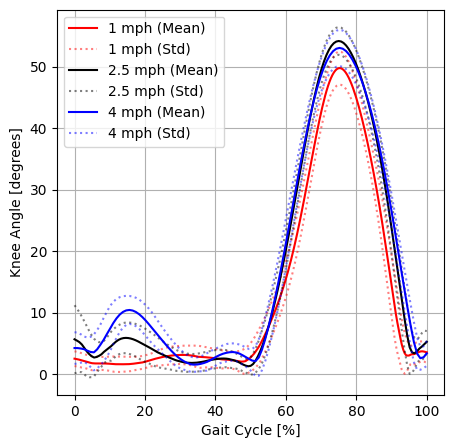

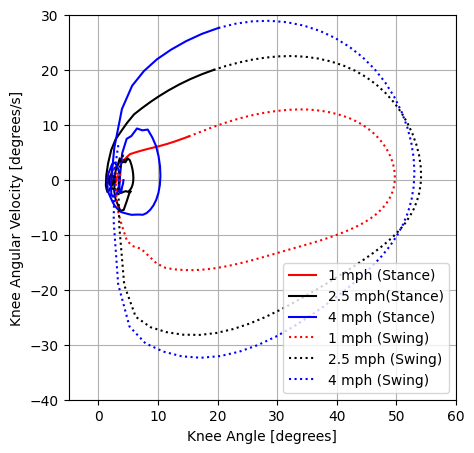

In [20]:
plt.figure(figsize=[5,5])

t_vec_1mph = np.linspace(start=0, stop=100, num=len(cropped_knee_1mph[0][180:len(cropped_knee_1mph[0])-60]))
mean_1mph = np.mean(cropped_knee_1mph, axis=0)[180:len(cropped_knee_1mph[0])-60]
std_1mph = np.std(cropped_knee_1mph, axis=0)[180:len(cropped_knee_1mph[0])-60]
plt.plot(t_vec_1mph, mean_1mph, color='red', label='1 mph (Mean)')
plt.plot(t_vec_1mph, mean_1mph+std_1mph, alpha=0.5, linestyle = ':', color='red', label='1 mph (Std)')
plt.plot(t_vec_1mph, mean_1mph-std_1mph, alpha=0.5, linestyle = ':', color='red')

t_vec_3mph = np.linspace(start=0, stop=100, num=len(cropped_knee_3mph[0][12:len(cropped_knee_3mph[0])-3]))
mean_3mph = np.mean(cropped_knee_3mph, axis=0)[12:len(cropped_knee_3mph[0])-3]
std_3mph = np.std(cropped_knee_3mph, axis=0)[12:len(cropped_knee_3mph[0])-3]
plt.plot(t_vec_3mph, mean_3mph, color='black', label='2.5 mph (Mean)')
plt.plot(t_vec_3mph, mean_3mph+std_3mph, alpha=0.5, linestyle = ':', color='black', label='2.5 mph (Std)')
plt.plot(t_vec_3mph, mean_3mph-std_3mph, alpha=0.5, linestyle = ':', color='black')

t_vec_4mph = np.linspace(start=0, stop=100, num=len(cropped_knee_4mph[0][8:len(cropped_knee_4mph[0])-2]))
mean_4mph = np.mean(cropped_knee_4mph, axis=0)[8:len(cropped_knee_4mph[0])-2]
std_4mph = np.std(cropped_knee_4mph, axis=0)[8:len(cropped_knee_4mph[0])-2]
plt.plot(t_vec_4mph, mean_4mph, color='blue', label='4 mph (Mean)')
plt.plot(t_vec_4mph, mean_4mph+std_4mph, alpha=0.5, linestyle = ':', color='blue', label='4 mph (Std)')
plt.plot(t_vec_4mph, mean_4mph-std_4mph, alpha=0.5, linestyle = ':', color='blue')



plt.grid()
plt.ylabel('Knee Angle [degrees]')
plt.xlabel('Gait Cycle [%]')
plt.legend(loc='upper left')


mean_1mph_diff = np.zeros(len(mean_1mph)-1)
for i in range(len(mean_1mph_diff)):
    mean_1mph_diff[i] = (mean_1mph[i+1] - mean_1mph[i])*10

mean_25mph_diff = np.zeros(len(mean_3mph)-1)
for i in range(len(mean_25mph_diff)):
    mean_25mph_diff[i] = (mean_3mph[i+1] - mean_3mph[i])*10

mean_4mph_diff = np.zeros(len(mean_4mph)-1)
for i in range(len(mean_4mph_diff)):
    mean_4mph_diff[i] = (mean_4mph[i+1] - mean_4mph[i])*10


stance_1mph = int(len(mean_1mph[1:])*0.6)
stance_25mph = int(len(mean_3mph[1:])*0.6)
stance_4mph = int(len(mean_4mph[1:])*0.6)

plt.figure(figsize=[5,5])
plt.plot(mean_1mph[1:stance_1mph+1], mean_1mph_diff[0:stance_1mph], label='1 mph (Stance)', color='red')
plt.plot(mean_3mph[1:stance_25mph+1], mean_25mph_diff[0:stance_25mph], label='2.5 mph(Stance)', color='black')
plt.plot(mean_4mph[1:stance_4mph+1], mean_4mph_diff[0:stance_4mph], label='4 mph (Stance)', color='blue')
plt.plot(mean_1mph[stance_1mph:], mean_1mph_diff[stance_1mph-1:], label='1 mph (Swing)', color='red', linestyle = ':')
plt.plot(mean_3mph[stance_25mph:], mean_25mph_diff[stance_25mph-1:], label='2.5 mph (Swing)', color='black', linestyle = ':')
plt.plot(mean_4mph[stance_4mph:], mean_4mph_diff[stance_4mph-1:], label='4 mph (Swing)', color='blue', linestyle = ':')
plt.legend(loc='lower right')
plt.xlabel('Knee Angle [degrees]')
plt.ylabel('Knee Angular Velocity [degrees/s]')
plt.xlim([-5, 60])
plt.ylim([-40, 30])
plt.grid()

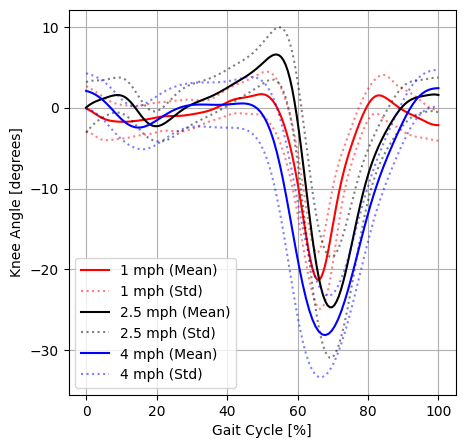

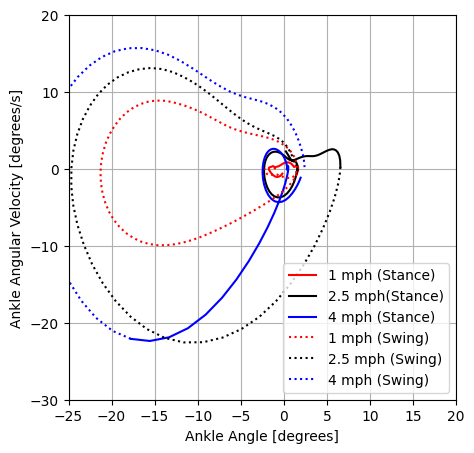

In [17]:
plt.figure(figsize=[5,5])
t_vec_1mph = np.linspace(start=0, stop=100, num=len(cropped_knee_1mph[0][160:len(cropped_knee_1mph[0])-40]))
mean_1mph = np.mean(cropped_ankle_1mph, axis=0)[160:len(cropped_ankle_1mph[0])-40] -3
std_1mph = np.std(cropped_ankle_1mph, axis=0)[160:len(cropped_ankle_1mph[0])-40]
plt.plot(t_vec_1mph, mean_1mph, color='red', label='1 mph (Mean)')
plt.plot(t_vec_1mph, mean_1mph+std_1mph, alpha=0.5, linestyle = ':', color='red', label='1 mph (Std)')
plt.plot(t_vec_1mph, mean_1mph-std_1mph, alpha=0.5, linestyle = ':', color='red')

t_vec_3mph = np.linspace(start=0, stop=100, num=len(cropped_ankle_3mph[0]))
mean_3mph = np.mean(cropped_ankle_3mph, axis=0) -3
std_3mph = np.std(cropped_ankle_3mph, axis=0)
plt.plot(t_vec_3mph, mean_3mph, color='black', label='2.5 mph (Mean)')
plt.plot(t_vec_3mph, mean_3mph+std_3mph, alpha=0.5, linestyle = ':', color='black', label='2.5 mph (Std)')
plt.plot(t_vec_3mph, mean_3mph-std_3mph, alpha=0.5, linestyle = ':', color='black')

t_vec_4mph = np.linspace(start=0, stop=100, num=len(cropped_knee_4mph[0][8:len(cropped_knee_4mph[0])-2]))
mean_4mph = np.mean(cropped_ankle_4mph, axis=0)[8:len(cropped_knee_4mph[0])-2] - 6
std_4mph = np.std(cropped_ankle_4mph, axis=0)[8:len(cropped_knee_4mph[0])-2]
plt.plot(t_vec_4mph, mean_4mph, color='blue', label='4 mph (Mean)')
plt.plot(t_vec_4mph, mean_4mph+std_4mph, alpha=0.5, linestyle = ':', color='blue', label='4 mph (Std)')
plt.plot(t_vec_4mph, mean_4mph-std_4mph, alpha=0.5, linestyle = ':', color='blue')


plt.grid()
plt.ylabel('Knee Angle [degrees]')
plt.xlabel('Gait Cycle [%]')
plt.legend(loc='lower left')

mean_1mph_diff = np.zeros(len(mean_1mph)-1)
for i in range(len(mean_1mph_diff)):
    mean_1mph_diff[i] = (mean_1mph[i+1] - mean_1mph[i])*10

mean_25mph_diff = np.zeros(len(mean_3mph)-1)
for i in range(len(mean_25mph_diff)):
    mean_25mph_diff[i] = (mean_3mph[i+1] - mean_3mph[i])*10

mean_4mph_diff = np.zeros(len(mean_4mph)-1)
for i in range(len(mean_4mph_diff)):
    mean_4mph_diff[i] = (mean_4mph[i+1] - mean_4mph[i])*10

plt.figure(figsize=[5,5])
plt.plot(mean_1mph[1:stance_1mph+1], mean_1mph_diff[0:stance_1mph], label='1 mph (Stance)', color='red')
plt.plot(mean_3mph[1:stance_25mph+1], mean_25mph_diff[0:stance_25mph], label='2.5 mph(Stance)', color='black')
plt.plot(mean_4mph[1:stance_4mph+1], mean_4mph_diff[0:stance_4mph], label='4 mph (Stance)', color='blue')
plt.plot(mean_1mph[stance_1mph:], mean_1mph_diff[stance_1mph-1:], label='1 mph (Swing)', color='red', linestyle = ':')
plt.plot(mean_3mph[stance_25mph:], mean_25mph_diff[stance_25mph-1:], label='2.5 mph (Swing)', color='black', linestyle = ':')
plt.plot(mean_4mph[stance_4mph:], mean_4mph_diff[stance_4mph-1:], label='4 mph (Swing)', color='blue', linestyle = ':')
plt.legend(loc='lower right')
plt.xlabel('Ankle Angle [degrees]')
plt.ylabel('Ankle Angular Velocity [degrees/s]')
plt.xlim([-25, 20])
plt.ylim([-30, 20])
plt.grid()